### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [118]:
import pandas as pd
vhc=pd.read_csv("C:\\Users\\Vinay Dwivedi\\Downloads\\Video\\20.10.19\\Lab\\vehicle.csv")
#vhc[vhc.isna().any(axis=1)].info()
vhc.dropna(inplace=True)
vhc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

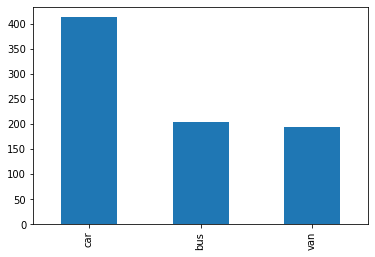

In [119]:
%matplotlib inline
vhc['class'].value_counts().plot(kind='bar')

### Check for any missing values in the data 

In [120]:
vhc[vhc.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 19 columns):
compactness                    0 non-null int64
circularity                    0 non-null float64
distance_circularity           0 non-null float64
radius_ratio                   0 non-null float64
pr.axis_aspect_ratio           0 non-null float64
max.length_aspect_ratio        0 non-null int64
scatter_ratio                  0 non-null float64
elongatedness                  0 non-null float64
pr.axis_rectangularity         0 non-null float64
max.length_rectangularity      0 non-null int64
scaled_variance                0 non-null float64
scaled_variance.1              0 non-null float64
scaled_radius_of_gyration      0 non-null float64
scaled_radius_of_gyration.1    0 non-null float64
skewness_about                 0 non-null float64
skewness_about.1               0 non-null float64
skewness_about.2               0 non-null float64
hollows_ratio                  0 non-null int64
class          

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [242]:
import matplotlib.pyplot as plt   
import seaborn as sns
import numpy as np

l=["cars","vans","bus"]

vhc_z = vhc.copy()
cols = list(vhc_z.columns)
cols.remove('class')

# now iterate over the remaining columns and create a new zscore column
for col in cols:
    col_zscore = col + '_zscore'
    vhc_z[col_zscore] = (vhc[col] - vhc[col].mean())/vhc[col].std(ddof=0)

vhc_z.drop(vhc_z.iloc[:, 0:19], inplace=True, axis=1)
vhc_z['class']=vhc['class']
c=pd.get_dummies(vhc_z['class'])
vhc_z['class']=np.argmax(c.values,axis=1)
#sns.pairplot(vhc_z, diag_kind='kde', hue = 'class')

In [ ]:
### K - Means Clustering

In [161]:
### Assign a dummy array called Cluster_error

In [243]:
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial import distance

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#print("Input Data Shape")
# Getting the values and plotting it
#f1 = vhc_z['V1'].values
#f2 = vhc_z['V2'].values
#X = np.array(list(zip(f1, f2)))
#plt.scatter(vhc_z[:,:17],vhc_z[:,18], c='black', s=7)




In [249]:
# Let us check optimal number of clusters-
distortion = []

cluster_range = range( 1, 11)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(vhc_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  distortion.append(sum(np.min(distance.cdist(vhc_z, clusters.cluster_centers_, 'euclidean'), axis=1))/ vhc_z.shape[0])

  # cdist computes distance between records of X and cluster_centers using euclidian method above
  # since we are using euclidian, it will do (xi - xbar)^2 for every record in X in all dimensions and add underroot to get dist
  # It will assign a given record to that cluster whos distance is min
  # Sum up all the distances between data points and their cluster centers and append that to distortions array
  # Distortions is the total spread among data points in all clusters put together
  # Distortions will be 0 when each data point is a cluster but that is not useful to extract any information
  # Distortion is another measure of spread, equivalent to intertia


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]


,num_clusters,cluster_errors
0,1,15033.876999
1,2,9012.725488
2,3,7430.523057
3,4,6807.848613
4,5,5595.860181
5,6,5080.640856
6,7,4689.451538
7,8,4412.159988
8,9,4086.948505
9,10,3869.475307


In [ ]:
#Since the drop in cluster_errors does not occue significantly after n=3, hence setting n as 3 and 
#re-running

In [250]:
distortion = []

cluster_range = range( 1, 4)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(vhc_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  distortion.append(sum(np.min(distance.cdist(vhc_z, clusters.cluster_centers_, 'euclidean'), axis=1))/ vhc_z.shape[0])

  # cdist computes distance between records of X and cluster_centers using euclidian method above
  # since we are using euclidian, it will do (xi - xbar)^2 for every record in X in all dimensions and add underroot to get dist
  # It will assign a given record to that cluster whos distance is min
  # Sum up all the distances between data points and their cluster centers and append that to distortions array
  # Distortions is the total spread among data points in all clusters put together
  # Distortions will be 0 when each data point is a cluster but that is not useful to extract any information
  # Distortion is another measure of spread, equivalent to intertia


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]


,num_clusters,cluster_errors
0,1,15033.876999
1,2,9012.725488
2,3,7429.013158


### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [251]:
Out[249]

,num_clusters,cluster_errors
0,1,15033.876999
1,2,9012.725488
2,3,7430.523057
3,4,6807.848613
4,5,5595.860181
5,6,5080.640856
6,7,4689.451538
7,8,4412.159988
8,9,4086.948505
9,10,3869.475307


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

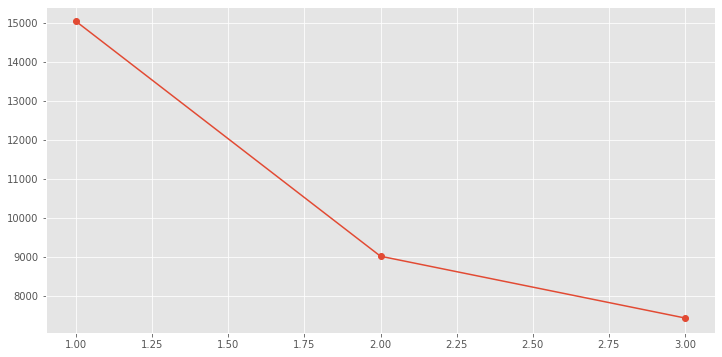

In [252]:
# Elbow plot, Scree Plot


plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

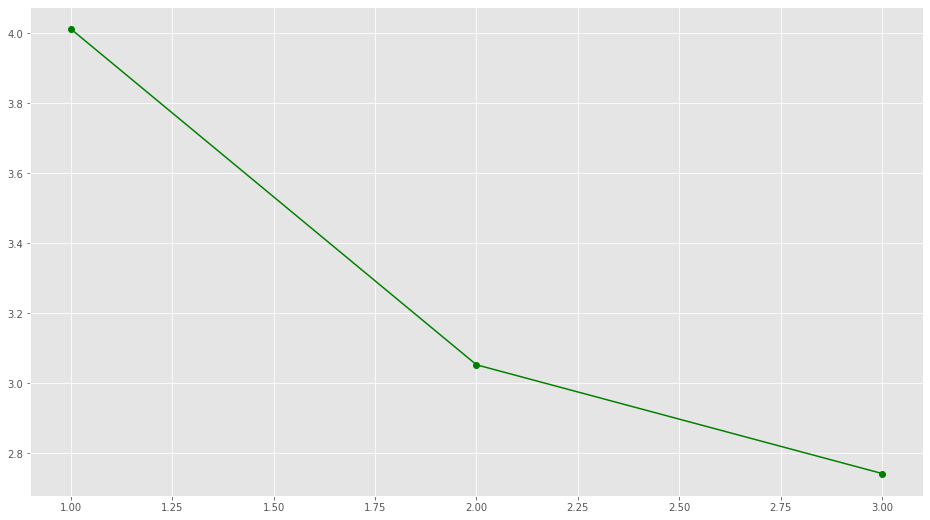

In [253]:
plt.plot(range(1,4), distortion, 'go-')

### Find out the optimal value of K

In [0]:
optimal value of k =3

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [255]:
#Given in Next line

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [254]:
# Number of clusters

kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(vhc_z)

# Getting the cluster labels

labels = kmeans.predict(vhc_z)

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[ 1.13076532  1.17094237  1.19500584  1.01909505  0.21505188  0.34250798
   1.27180461 -1.19061224  1.27548416  1.09266768  1.22038121  1.28132727
   1.07954232 -0.02879497  0.16229031  0.26566456 -0.00535553  0.18380067
   0.84615385]
 [-0.23221764 -0.58195888 -0.30748835 -0.02982427  0.2017708  -0.11576889
  -0.46081447  0.32755691 -0.48973008 -0.54264519 -0.41474078 -0.46483179
  -0.61104076 -0.62287875 -0.07217703  0.01483601  0.82321904  0.70627664
   1.08360129]
 [-0.91644338 -0.51014796 -0.88872993 -1.05656762 -0.49034796 -0.2192064
  -0.77419794  0.85821894 -0.74099102 -0.47657415 -0.77816005 -0.77926613
  -0.37457573  0.83141315 -0.08160507 -0.30449084 -1.05218465 -1.10512484
   1.01652893]]


In [256]:
centroids.shape

(3, 19)

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [257]:
cent_new = pd.DataFrame(centroids, columns=vhc_z.columns)
cent_new

,compactness_zscore,circularity_zscore,distance_circularity_zscore,radius_ratio_zscore,pr.axis_aspect_ratio_zscore,max.length_aspect_ratio_zscore,scatter_ratio_zscore,elongatedness_zscore,pr.axis_rectangularity_zscore,max.length_rectangularity_zscore,scaled_variance_zscore,scaled_variance.1_zscore,scaled_radius_of_gyration_zscore,scaled_radius_of_gyration.1_zscore,skewness_about_zscore,skewness_about.1_zscore,skewness_about.2_zscore,hollows_ratio_zscore,class
0,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801,0.846154
1,-0.232218,-0.581959,-0.307488,-0.029824,0.201771,-0.115769,-0.460814,0.327557,-0.489730,-0.542645,-0.414741,-0.464832,-0.611041,-0.622879,-0.072177,0.014836,0.823219,0.706277,1.083601
2,-0.916443,-0.510148,-0.888730,-1.056568,-0.490348,-0.219206,-0.774198,0.858219,-0.740991,-0.476574,-0.778160,-0.779266,-0.374576,0.831413,-0.081605,-0.304491,-1.052185,-1.105125,1.016529


Hint: Use pd.Dataframe function 

In [258]:
prediction= kmeans.predict(vhc_z)  #Using the KMeans cluster object to assign cluster_id to each record in X.
#X["clusters"] = prediction
#X_df = pd.DataFrame(vhc_z, columns= colnames)
vhc_z["group"] = prediction  # Store the cluster id into a new "group" column


vhc_z.tail(5)

,compactness_zscore,circularity_zscore,distance_circularity_zscore,radius_ratio_zscore,pr.axis_aspect_ratio_zscore,max.length_aspect_ratio_zscore,scatter_ratio_zscore,elongatedness_zscore,pr.axis_rectangularity_zscore,max.length_rectangularity_zscore,scaled_variance_zscore,scaled_variance.1_zscore,scaled_radius_of_gyration_zscore,scaled_radius_of_gyration.1_zscore,skewness_about_zscore,skewness_about.1_zscore,skewness_about.2_zscore,hollows_ratio_zscore,class,group
841,-0.079822,-0.944703,0.314261,0.413803,0.279250,-0.128151,0.013207,-0.126809,-0.217151,-0.958335,0.373150,-0.093528,-0.781504,-0.053505,0.131793,1.380091,-0.159204,-0.098644,1,1
842,-0.565926,0.194828,0.124067,-0.181529,0.530251,0.513657,-0.289256,0.257876,-0.217151,0.766312,-0.493716,-0.401813,0.054092,-0.053505,-1.088104,0.819644,-0.484413,0.171837,2,1
843,1.500018,1.497149,1.201833,1.574700,0.655752,0.727593,1.616264,-1.409094,1.727163,1.732113,1.272121,1.613458,0.796844,-0.321192,-0.681472,-0.973784,-0.321809,0.712800,1,0
844,-0.930504,-1.433074,-0.256321,-0.687560,-0.473753,-0.342087,-1.015169,1.155476,-0.994877,-1.648193,-1.071626,-0.961293,-0.812452,-0.856567,-1.291420,1.380091,0.166004,-0.098644,1,1
845,-1.052030,-1.433074,-1.017098,-1.372192,-0.850254,-0.769959,-1.468864,1.924847,-1.383740,-1.372250,-1.553218,-1.292414,-1.338567,0.080339,-1.088104,0.595466,-0.484413,-0.774847,2,2


### Use kmeans.labels_ function to print out the labels of the classes

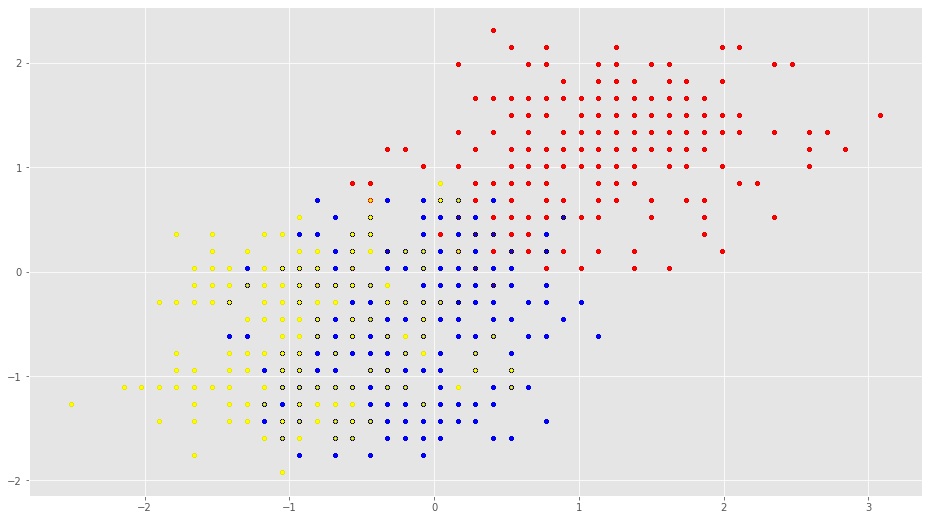

In [260]:
colors = ['red','blue', 'yellow']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(vhc_z.loc[vhc_z['group'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [261]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

In [ ]:
### 9. Combine all three arrays a,b,c into a dataframe

In [262]:
result = np.concatenate((a,b,c),axis=0)
result.shape

(250, 2)

In [263]:
df=pd.DataFrame(result)
df.columns = ['Col1', 'Col2']
df.head()

,Col1,Col2
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773


### 10. Use scatter matrix to print all the 3 distributions

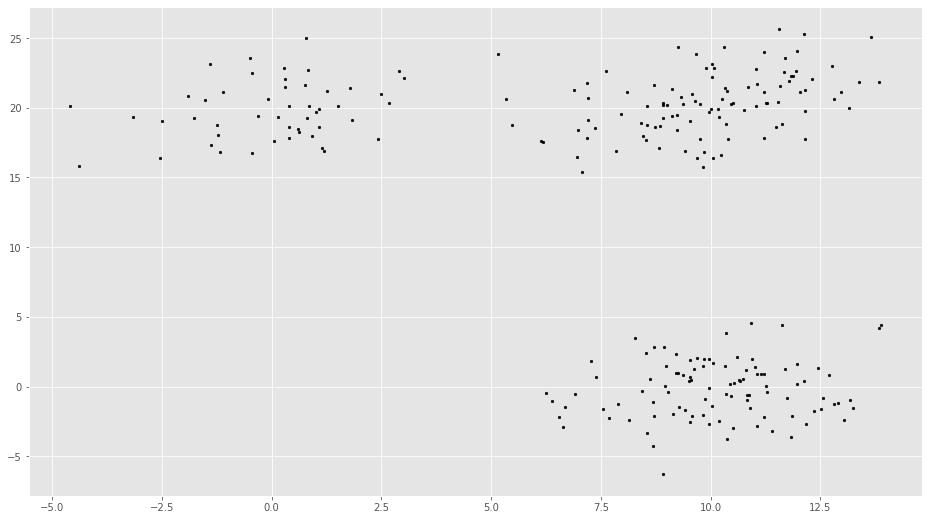

In [264]:
# Getting the values and plotting it

f1 = df['Col1'].values
f2 = df['Col2'].values

X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='black', s=7)

### 11. Find out the linkage matrix

In [0]:
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [265]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
Z = linkage(df, 'ward')
c, coph_dists = cophenet(Z , pdist(df))

c

0.9536963071171022

### 12. Plot the dendrogram for the consolidated dataframe

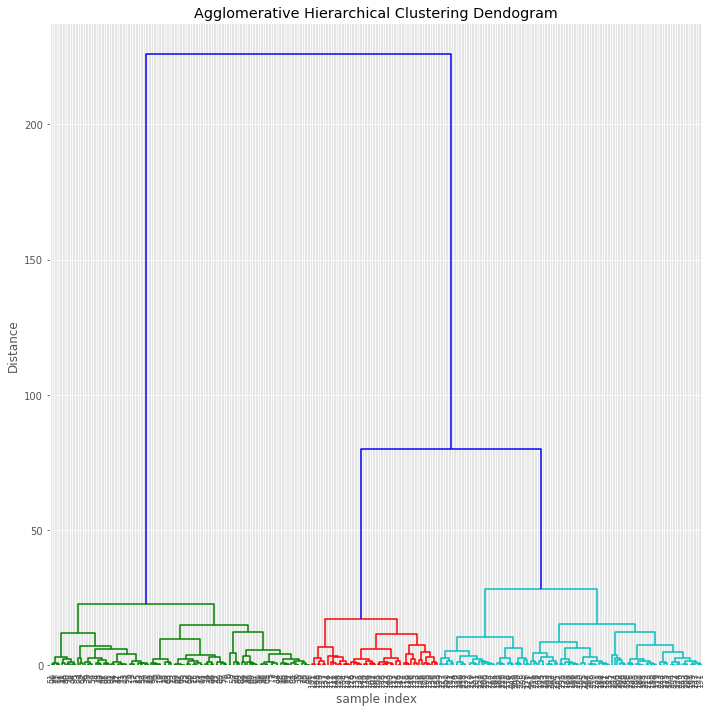

In [266]:
from sklearn.cluster import AgglomerativeClustering 
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

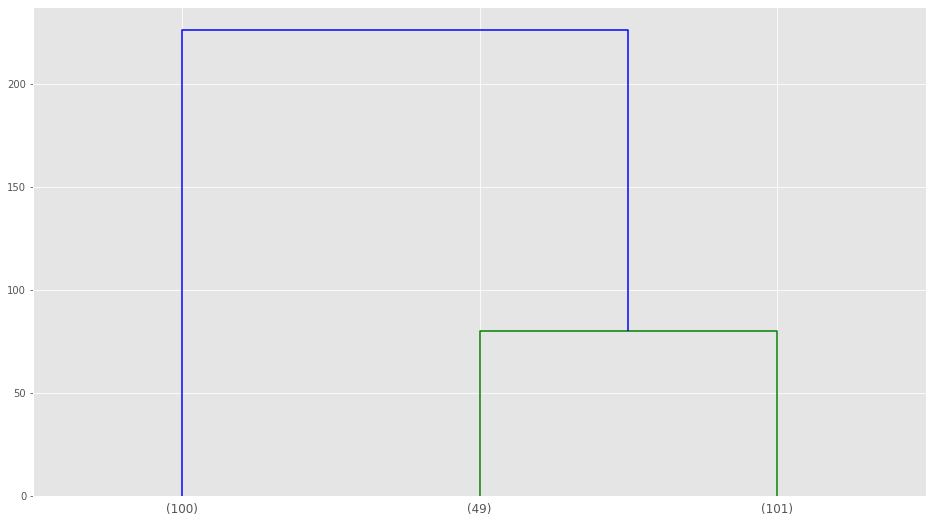

In [267]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()